In [81]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math

In [82]:
H = 75
W = 75
R = 5 # radius of local flockmates
v0 = 1

N = 500
steps = 200

In [83]:
# initialising positions
x = W*np.random.rand(N,1)
y = H*np.random.rand(N,1)

#initialising velocity of each boid
phi = 2 * np.pi * np.random.rand(N,1)
vx = v0*np.cos(phi)
vy = v0*np.sin(phi)

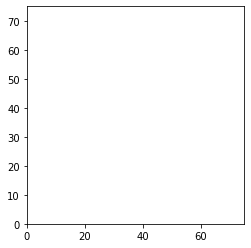

In [84]:
fig, ax = plt.subplots()
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.set_aspect('equal')

In [85]:
boids = []
for i in range(N):
    boid, = ax.plot([], [], 'ko', markersize=1)
    boids.append(boid)

In [86]:
def update(steps):
    
    for i in range(N):
        localz = (x-x[i])**2+(y-y[i])**2 < R**2
        localz[i] = False
        if True not in localz:
            x[i] += v0
            y[i] += v0
            continue

#         separation_x = x[i] - np.sum(x[localz])
#         separation_y = y[i] - np.sum(y[localz])
        
        separation = np.transpose(np.array([x[i] - np.sum(x[localz]),y[i] - np.sum(y[localz])]))[0]
        separation /= np.linalg.norm(separation)

#         alignment_x = np.mean(np.cos(phi[localz]))
#         alignment_y = np.mean(np.sin(phi[localz]))
        
        alignment = np.array([np.mean(np.cos(phi[localz])),np.mean(np.sin(phi[localz]))])
        
#         cohesion_x = np.mean(x[localz])
#         cohesion_y = np.mean(y[localz])
        
        cohesion = np.array([np.mean(x[localz]),np.mean(y[localz])])
        cohesion /= np.linalg.norm(cohesion)
        
#         move_x = separation_x + alignment_x + cohesion_x
#         move_y = separation_y + alignment_y + cohesion_y

        move = separation + alignment + cohesion
    
#         phi[i] = math.atan2(move_y, move_x)

        phi[i] = math.atan2(move[1], move[0])
        
        vx[i] = v0*np.cos(phi[i])
        vy[i] = v0*np.sin(phi[i])
        
        x[i] += vx[i]
        y[i] += vy[i]
        
        boids[i].set_data([x[i], y[i]])
   
    return boids


In [87]:
anim = FuncAnimation(fig, update, frames=steps, interval=0)

In [88]:
anim.save("boids.gif", writer="Pillow", fps=10)

MovieWriter Pillow unavailable; using Pillow instead.
